In [ ]:
import pandas as pd
import numpy as np
import itertools
import ast
import streamlit as st

# Streamlit UI
st.title("Marketing Attribution Analysis")
uploaded_file = st.file_uploader("Upload CSV File", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)

    # Convert string representation of list to actual lists
    df["journey"] = df["journey"].apply(ast.literal_eval)

    st.write("Uploaded Data Preview:")
    st.write(df.head())

    # Ensure required columns exist
    required_columns = {"journey", "converted", "Email", "Social Media", "Search", "Display", "Referral", "Direct"}
    if not required_columns.issubset(df.columns):
        st.error(f"CSV must contain the following columns: {required_columns}")
    else:
        ### FIRST-TOUCH ATTRIBUTION
        first_touch_attribution = df[df["converted"] == 1].groupby(df["journey"].str[0])["converted"].sum()
        st.subheader("First-Touch Attribution:")
        st.write(first_touch_attribution)

        ### LAST-TOUCH ATTRIBUTION
        last_touch_attribution = df[df["converted"] == 1].groupby(df["journey"].str[-1])["converted"].sum()
        st.subheader("Last-Touch Attribution:")
        st.write(last_touch_attribution)

        ### SHAPLEY VALUE ATTRIBUTION
        def shapley_value(df):
            """Computes Shapley values for marketing channels based on customer journeys."""
            channels = ["Email", "Social Media", "Search", "Display", "Referral", "Direct"]
            conversions = {ch: 0 for ch in channels}

            # Filter only converted journeys
            for _, row in df[df["converted"] == 1].iterrows():
                path = row["journey"]
                subsets = []
                for i in range(1, len(path) + 1):
                    subsets.extend(itertools.combinations(path, i))

                subset_contributions = {ch: 0 for ch in path}
                for subset in subsets:
                    contribution = 1 / len(subset)
                    for ch in subset:
                        subset_contributions[ch] += contribution

                for ch in path:
                    conversions[ch] += subset_contributions[ch]

            total_conversions = sum(conversions.values())
            return {ch: round(conversions[ch] / total_conversions, 4) if total_conversions > 0 else 0 for ch in conversions}

        shapley_values = shapley_value(df)
        st.subheader("Shapley Value Attribution:")
        st.write(shapley_values)


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import itertools
import ast

# Load the dataset
file_path = "your_file.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Convert journey column from string to list
df["journey"] = df["journey"].apply(ast.literal_eval)

# First-Touch Attribution
first_touch = df[df["converted"] == 1].groupby(df["journey"].str[0])["converted"].sum()
print("First-Touch Attribution:\n", first_touch)

# Last-Touch Attribution
last_touch = df[df["converted"] == 1].groupby(df["journey"].str[-1])["converted"].sum()
print("\nLast-Touch Attribution:\n", last_touch)

# Shapley Value Attribution Function
def shapley_value(df):
    """Computes Shapley values for marketing channels based on customer journeys."""
    channels = ["Email", "Social Media", "Search", "Display", "Referral", "Direct"]
    conversions = {ch: 0 for ch in channels}

    for _, row in df[df["converted"] == 1].iterrows():
        path = row["journey"]
        subsets = []
        for i in range(1, len(path) + 1):
            subsets.extend(itertools.combinations(path, i))

        subset_contributions = {ch: 0 for ch in path}
        for subset in subsets:
            contribution = 1 / len(subset)
            for ch in subset:
                subset_contributions[ch] += contribution

        for ch in path:
            conversions[ch] += subset_contributions[ch]

    total_conversions = sum(conversions.values())
    return {ch: round(conversions[ch] / total_conversions, 4) if total_conversions > 0 else 0 for ch in conversions}

shapley_values = shapley_value(df)
print("\nShapley Value Attribution:\n", shapley_values)


FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'

In [ ]:
import pandas as pd
import numpy as np
import itertools
import ast
from tkinter import Tk, filedialog

# File Upload Dialog
def upload_file():
    """Opens a file dialog for the user to upload a CSV file."""
    root = Tk()
    root.withdraw()  # Hide the root window
    file_path = filedialog.askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
    return file_path

# Load the dataset
file_path = upload_file()

if file_path:
    df = pd.read_csv(file_path)

    # Convert journey column from string to list
    df["journey"] = df["journey"].apply(ast.literal_eval)

    print("Uploaded Data Preview:\n", df.head())

    # First-Touch Attribution
    first_touch = df[df["converted"] == 1].groupby(df["journey"].str[0])["converted"].sum()
    print("\nFirst-Touch Attribution:\n", first_touch)

    # Last-Touch Attribution
    last_touch = df[df["converted"] == 1].groupby(df["journey"].str[-1])["converted"].sum()
    print("\nLast-Touch Attribution:\n", last_touch)

    # Shapley Value Attribution Function
    def shapley_value(df):
        """Computes Shapley values for marketing channels based on customer journeys."""
        channels = ["Email", "Social Media", "Search", "Display", "Referral", "Direct"]
        conversions = {ch: 0 for ch in channels}

        for _, row in df[df["converted"] == 1].iterrows():
            path = row["journey"]
            subsets = []
            for i in range(1, len(path) + 1):
                subsets.extend(itertools.combinations(path, i))

            subset_contributions = {ch: 0 for ch in path}
            for subset in subsets:
                contribution = 1 / len(subset)
                for ch in subset:
                    subset_contributions[ch] += contribution

            for ch in path:
                conversions[ch] += subset_contributions[ch]

        total_conversions = sum(conversions.values())
        return {ch: round(conversions[ch] / total_conversions, 4) if total_conversions > 0 else 0 for ch in conversions}

    shapley_values = shapley_value(df)
    print("\nShapley Value Attribution:\n", shapley_values)
else:
    print("No file selected. Please try again.")


TclError: no display name and no $DISPLAY environment variable

In [ ]:
import pandas as pd
import numpy as np
import itertools
import ast
import io
from IPython.display import display
import ipywidgets as widgets

# Create file upload widget
upload_widget = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_widget)

def handle_upload(change):
    """Handles the uploaded file, reads it into a DataFrame, and processes attribution models."""
    uploaded_file = next(iter(upload_widget.value.values()))  # Get uploaded file
    df = pd.read_csv(io.BytesIO(uploaded_file['content']))

    # Convert journey column from string to list
    df["journey"] = df["journey"].apply(ast.literal_eval)

    print("\nUploaded Data Preview:\n", df.head())

    # First-Touch Attribution
    first_touch = df[df["converted"] == 1].groupby(df["journey"].str[0])["converted"].sum()
    print("\nFirst-Touch Attribution:\n", first_touch)

    # Last-Touch Attribution
    last_touch = df[df["converted"] == 1].groupby(df["journey"].str[-1])["converted"].sum()
    print("\nLast-Touch Attribution:\n", last_touch)

    # Shapley Value Attribution Function
    def shapley_value(df):
        """Computes Shapley values for marketing channels based on customer journeys."""
        channels = ["Email", "Social Media", "Search", "Display", "Referral", "Direct"]
        conversions = {ch: 0 for ch in channels}

        for _, row in df[df["converted"] == 1].iterrows():
            path = row["journey"]
            subsets = []
            for i in range(1, len(path) + 1):
                subsets.extend(itertools.combinations(path, i))

            subset_contributions = {ch: 0 for ch in path}
            for subset in subsets:
                contribution = 1 / len(subset)
                for ch in subset:
                    subset_contributions[ch] += contribution

            for ch in path:
                conversions[ch] += subset_contributions[ch]

        total_conversions = sum(conversions.values())
        return {ch: round(conversions[ch] / total_conversions, 4) if total_conversions > 0 else 0 for ch in conversions}

    shapley_values = shapley_value(df)
    print("\nShapley Value Attribution:\n", shapley_values)

# Attach event handler to widget
upload_widget.observe(handle_upload, names='value')


FileUpload(value={}, accept='.csv', description='Upload')


Uploaded Data Preview:
                                              journey  converted  Email  \
0  [Display, Referral, Search, Referral, Referral...          0      0   
1  [Referral, Display, Search, Direct, Referral, ...          0      0   
2   [Email, Display, Social Media, Direct, Referral]          0      1   
3                                           [Search]          0      0   
4  [Display, Display, Direct, Direct, Direct, Sea...          1      1   

   Social Media  Search  Display  Referral  Direct  
0             1       1        1         1       0  
1             1       1        1         1       1  
2             1       0        1         1       1  
3             0       1        0         0       0  
4             0       1        1         0       1  

First-Touch Attribution:
 journey
Direct          308
Display         275
Email           316
Referral        290
Search          291
Social Media    307
Name: converted, dtype: int64

Last-Touch Attribution:
 j

In [ ]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import io
import ipywidgets as widgets
from IPython.display import display

# Create file upload widget
upload_widget = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_widget)

def handle_upload(change):
    """Handles the uploaded file, reads it into a DataFrame, and processes Shapley & Markov Tests."""
    uploaded_file = next(iter(upload_widget.value.values()))  # Get uploaded file
    df = pd.read_csv(io.BytesIO(uploaded_file['content']))

    # Convert 'path' column to list format
    df["path"] = df["path"].apply(lambda x: x.split(" > "))

    print("\nUploaded Data Preview:\n", df.head())

    ### **🔹 SHAPLEY VALUE TEST**
    def shapley_value(df):
        """Computes Shapley values for MTA based on paths and conversions."""
        channels = set(itertools.chain(*df["path"]))  # Get unique channels
        contributions = {ch: 0 for ch in channels}

        for _, row in df.iterrows():
            path = row["path"]
            conversion = row["total_conversions"]
            subsets = []

            # Generate all subsets of the path
            for i in range(1, len(path) + 1):
                subsets.extend(itertools.combinations(path, i))

            subset_contributions = {ch: 0 for ch in path}
            for subset in subsets:
                contribution = conversion / len(subset)
                for ch in subset:
                    subset_contributions[ch] += contribution

            # Sum contributions across all paths
            for ch in path:
                contributions[ch] += subset_contributions[ch]

        total_conversions = sum(contributions.values())
        shapley_result = {ch: round(contributions[ch] / total_conversions, 4) if total_conversions > 0 else 0 for ch in contributions}

        return shapley_result

    shapley_values = shapley_value(df)
    print("\n🔹 Shapley Value Attribution:\n", shapley_values)


    ### **🔹 MARKOV CHAIN TEST**
    def markov_chain(df):
        """Computes Markov chain-based attribution by modeling customer journey transitions."""
        transition_matrix = {}
        all_paths = df["path"].tolist()

        for path in all_paths:
            for i in range(len(path) - 1):
                current, next_channel = path[i], path[i + 1]
                if current not in transition_matrix:
                    transition_matrix[current] = {}
                if next_channel not in transition_matrix[current]:
                    transition_matrix[current][next_channel] = 0
                transition_matrix[current][next_channel] += 1

        # Normalize transition probabilities
        for current, transitions in transition_matrix.items():
            total = sum(transitions.values())
            transition_matrix[current] = {next_ch: round(count / total, 4) for next_ch, count in transitions.items()}

        # Convert to NetworkX Graph
        G = nx.DiGraph()
        for src, transitions in transition_matrix.items():
            for dest, prob in transitions.items():
                G.add_edge(src, dest, weight=prob)

        # Compute PageRank as a proxy for channel attribution
        markov_values = nx.pagerank(G, alpha=0.85)

        return markov_values

    markov_values = markov_chain(df)
    print("\n🔹 Markov Chain Attribution:\n", markov_values)

# Attach event handler to widget
upload_widget.observe(handle_upload, names='value')


FileUpload(value={}, accept='.csv', description='Upload')


Uploaded Data Preview:
                                                 path  total_conversions  \
0                            [eta, iota, alpha, eta]                  1   
1                           [iota, iota, iota, iota]                  2   
2  [alpha, iota, alpha, alpha, alpha, iota, alpha...                  2   
3                                        [beta, eta]                  1   
4  [iota, eta, theta, lambda, lambda, theta, lambda]                  0   

   total_conversion_value  total_null  
0                   0.244           3  
1                   3.195           6  
2                   6.754           6  
3                   2.402           3  
4                   0.000           2  


In [ ]:

import pandas as pd
import numpy as np
import itertools
import networkx as nx
import io
import ipywidgets as widgets
from IPython.display import display

# Upload File Widget
upload_widget = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_widget)

def handle_upload(change):
    """Handles file upload and performs Shapley & Markov analysis."""
    uploaded_file = next(iter(upload_widget.value.values()))
    df = pd.read_csv(io.BytesIO(uploaded_file['content']))

    # Convert 'path' column from string to list if necessary
    if isinstance(df.iloc[0]["path"], str):  # Check if stored as a string
        df["path"] = df["path"].apply(lambda x: eval(x) if isinstance(x, str) else x)

    print("\n🔹 Uploaded Data Preview:\n", df.head())

    ### **🔹 SHAPLEY VALUE TEST**
    def shapley_value(df):
        """Computes Shapley values for MTA based on paths and conversions."""
        channels = set(itertools.chain(*df["path"]))  # Get unique channels
        contributions = {ch: 0 for ch in channels}

        for _, row in df.iterrows():
            path = row["path"]
            conversion = row["total_conversions"]
            subsets = []

            # Generate all subsets of the path
            for i in range(1, len(path) + 1):
                subsets.extend(itertools.combinations(path, i))

            subset_contributions = {ch: 0 for ch in path}
            for subset in subsets:
                contribution = conversion / len(subset)
                for ch in subset:
                    subset_contributions[ch] += contribution

            # Sum contributions across all paths
            for ch in path:
                contributions[ch] += subset_contributions[ch]

        total_conversions = sum(contributions.values())
        shapley_result = {ch: round(contributions[ch] / total_conversions, 4) if total_conversions > 0 else 0 for ch in contributions}

        return shapley_result

    shapley_values = shapley_value(df)
    print("\n🔹 Shapley Value Attribution:\n", shapley_values)

    ### **🔹 MARKOV CHAIN TEST**
    def markov_chain(df):
        """Computes Markov chain-based attribution by modeling customer journey transitions."""
        transition_matrix = {}
        all_paths = df["path"].tolist()

        for path in all_paths:
            for i in range(len(path) - 1):
                current, next_channel = path[i], path[i + 1]
                if current not in transition_matrix:
                    transition_matrix[current] = {}
                if next_channel not in transition_matrix[current]:
                    transition_matrix[current][next_channel] = 0
                transition_matrix[current][next_channel] += 1

        # Normalize transition probabilities
        for current, transitions in transition_matrix.items():
            total = sum(transitions.values())
            transition_matrix[current] = {next_ch: round(count / total, 4) for next_ch, count in transitions.items()}

        # Convert to NetworkX Graph
        G = nx.DiGraph()
        for src, transitions in transition_matrix.items():
            for dest, prob in transitions.items():
                G.add_edge(src, dest, weight=prob)

        # Compute PageRank as a proxy for channel attribution
        markov_values = nx.pagerank(G, alpha=0.85)

        return markov_values

    markov_values = markov_chain(df)
    print("\n🔹 Markov Chain Attribution:\n", markov_values)

# Attach event handler to widget
upload_widget.observe(handle_upload, names='value')


FileUpload(value={}, accept='.csv', description='Upload')

NameError: name 'eta' is not defined

In [ ]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import io
import ipywidgets as widgets
from IPython.display import display

# Upload File Widget
upload_widget = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_widget)

def handle_upload(change):
    """Handles file upload and performs Shapley & Markov analysis."""
    uploaded_file = next(iter(upload_widget.value.values()))
    df = pd.read_csv(io.BytesIO(uploaded_file['content']))

    # Convert 'path' column from string to list (Fixing NameError issue)
    df["path"] = df["path"].astype(str).apply(lambda x: x.split(" > "))

    print("\n🔹 Uploaded Data Preview:\n", df.head())

    ### **🔹 SHAPLEY VALUE TEST**
    def shapley_value(df):
        """Computes Shapley values for MTA based on paths and conversions."""
        channels = set(itertools.chain(*df["path"]))  # Get unique channels
        contributions = {ch: 0 for ch in channels}

        for _, row in df.iterrows():
            path = row["path"]
            conversion = row["total_conversions"]
            subsets = []

            # Generate all subsets of the path
            for i in range(1, len(path) + 1):
                subsets.extend(itertools.combinations(path, i))

            subset_contributions = {ch: 0 for ch in path}
            for subset in subsets:
                contribution = conversion / len(subset)
                for ch in subset:
                    subset_contributions[ch] += contribution

            # Sum contributions across all paths
            for ch in path:
                contributions[ch] += subset_contributions[ch]

        total_conversions = sum(contributions.values())
        shapley_result = {ch: round(contributions[ch] / total_conversions, 4) if total_conversions > 0 else 0 for ch in contributions}

        return shapley_result

    shapley_values = shapley_value(df)
    print("\n🔹 Shapley Value Attribution:\n", shapley_values)

    ### **🔹 MARKOV CHAIN TEST**
    def markov_chain(df):
        """Computes Markov chain-based attribution by modeling customer journey transitions."""
        transition_matrix = {}
        all_paths = df["path"].tolist()

        for path in all_paths:
            for i in range(len(path) - 1):
                current, next_channel = path[i], path[i + 1]
                if current not in transition_matrix:
                    transition_matrix[current] = {}
                if next_channel not in transition_matrix[current]:
                    transition_matrix[current][next_channel] = 0
                transition_matrix[current][next_channel] += 1

        # Normalize transition probabilities
        for current, transitions in transition_matrix.items():
            total = sum(transitions.values())
            transition_matrix[current] = {next_ch: round(count / total, 4) for next_ch, count in transitions.items()}

        # Convert to NetworkX Graph
        G = nx.DiGraph()
        for src, transitions in transition_matrix.items():
            for dest, prob in transitions.items():
                G.add_edge(src, dest, weight=prob)

        # Compute PageRank as a proxy for channel attribution
        markov_values = nx.pagerank(G, alpha=0.85)

        return markov_values

    markov_values = markov_chain(df)
    print("\n🔹 Markov Chain Attribution:\n", markov_values)

# Attach event handler to widget
upload_widget.observe(handle_upload, names='value')


FileUpload(value={}, accept='.csv', description='Upload')


🔹 Uploaded Data Preview:
                                                 path  total_conversions  \
0                            [eta, iota, alpha, eta]                  1   
1                           [iota, iota, iota, iota]                  2   
2  [alpha, iota, alpha, alpha, alpha, iota, alpha...                  2   
3                                        [beta, eta]                  1   
4  [iota, eta, theta, lambda, lambda, theta, lambda]                  0   

   total_conversion_value  total_null  
0                   0.244           3  
1                   3.195           6  
2                   6.754           6  
3                   2.402           3  
4                   0.000           2  


In [ ]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import io
import ipywidgets as widgets
from IPython.display import display

# Upload File Widget
upload_widget = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_widget)

def handle_upload(change):
    """Handles file upload and performs Shapley & Markov analysis."""
    uploaded_file = next(iter(upload_widget.value.values()))
    df = pd.read_csv(io.BytesIO(uploaded_file['content']))

    # Convert 'path' column from string to list
    df["path"] = df["path"].astype(str).apply(lambda x: x.split(" > "))

    print("\n🔹 Uploaded Data Preview:\n", df.head())

    ### **🔹 SHAPLEY VALUE TEST**
    def shapley_value(df):
        """Computes Shapley values for MTA based on paths and conversions."""
        channels = set(itertools.chain(*df["path"]))  # Get unique channels
        contributions = {ch: 0 for ch in channels}

        for _, row in df.iterrows():
            path = row["path"]
            conversion = row["total_conversions"]
            subsets = []

            # Generate all subsets of the path
            for i in range(1, len(path) + 1):
                subsets.extend(itertools.combinations(path, i))

            subset_contributions = {ch: 0 for ch in path}
            for subset in subsets:
                contribution = conversion / len(subset)
                for ch in subset:
                    subset_contributions[ch] += contribution

            # Sum contributions across all paths
            for ch in path:
                contributions[ch] += subset_contributions[ch]

        total_conversions = sum(contributions.values())
        shapley_result = {ch: round(contributions[ch] / total_conversions, 4) if total_conversions > 0 else 0 for ch in contributions}

        return shapley_result

    shapley_values = shapley_value(df)
    print("\n🔹 Shapley Value Attribution for All Rows:\n", shapley_values)

    ### **🔹 MARKOV CHAIN TEST**
    def markov_chain(df):
        """Computes Markov chain-based attribution by modeling customer journey transitions."""
        transition_matrix = {}
        all_paths = df["path"].tolist()

        for path in all_paths:
            for i in range(len(path) - 1):
                current, next_channel = path[i], path[i + 1]
                if current not in transition_matrix:
                    transition_matrix[current] = {}
                if next_channel not in transition_matrix[current]:
                    transition_matrix[current][next_channel] = 0
                transition_matrix[current][next_channel] += 1

        # Normalize transition probabilities
        for current, transitions in transition_matrix.items():
            total = sum(transitions.values())
            transition_matrix[current] = {next_ch: round(count / total, 4) for next_ch, count in transitions.items()}

        # Convert to NetworkX Graph
        G = nx.DiGraph()
        for src, transitions in transition_matrix.items():
            for dest, prob in transitions.items():
                G.add_edge(src, dest, weight=prob)

        # Compute PageRank as a proxy for channel attribution
        markov_values = nx.pagerank(G, alpha=0.85)

        return markov_values

    markov_values = markov_chain(df)
    print("\n🔹 Markov Chain Attribution for All Rows:\n", markov_values)

# Attach event handler to widget
upload_widget.observe(handle_upload, names='value')


FileUpload(value={}, accept='.csv', description='Upload')


🔹 Uploaded Data Preview:
                                                 path  total_conversions  \
0                            [eta, iota, alpha, eta]                  1   
1                           [iota, iota, iota, iota]                  2   
2  [alpha, iota, alpha, alpha, alpha, iota, alpha...                  2   
3                                        [beta, eta]                  1   
4  [iota, eta, theta, lambda, lambda, theta, lambda]                  0   

   total_conversion_value  total_null  
0                   0.244           3  
1                   3.195           6  
2                   6.754           6  
3                   2.402           3  
4                   0.000           2  


In [ ]:
# =====================================================
#  STEP 0: INSTALL & IMPORT LIBRARIES
# =====================================================
!pip install pandas numpy networkx matplotlib

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from math import factorial
from itertools import combinations
from google.colab import files

# =====================================================
#  STEP 2: READ & PREPARE THE DATA
# =====================================================
# Read CSV
df = pd.read_csv('MTA dataset.csv')

# Make sure you have these columns: "path", "total_conversions", "total_null"
# (and optionally "total_conversion_value" if you need it).
# If your column names differ, rename them accordingly here.

# Example:
# df = df.rename(columns={
#     'your_path_column': 'path',
#     'your_conversions_column': 'total_conversions',
#     'your_null_column': 'total_null',
#     'your_value_column': 'total_conversion_value'
# })

# PARSE the 'path' column into a list of channels
def parse_path(path_str):
    # If your delimiter is '>' or something else, adapt this.
    # Example: "eta > iota > alpha" => ["eta", "iota", "alpha"]
    return [x.strip() for x in path_str.split('>')]

df['channels'] = df['path'].apply(parse_path)

print("Sample of loaded data (first 5 rows):")
print(df.head())

# =====================================================
#  STEP 3: DEFINE ATTRIBUTION FUNCTIONS
# =====================================================

# -------- 3.1 FIRST-TOUCH --------
def first_touch(df):
    """
    Credits the first channel in each path with that path's total_conversions.
    Returns a dict: channel -> # of conversions credited.
    """
    results = {}
    for _, row in df.iterrows():
        conv = row['total_conversions']
        ch_list = row['channels']
        if conv > 0 and len(ch_list) > 0:
            first_ch = ch_list[0]
            results[first_ch] = results.get(first_ch, 0) + conv
    return results

# -------- 3.2 LAST-TOUCH --------
def last_touch(df):
    """
    Credits the last channel in each path with that path's total_conversions.
    Returns a dict: channel -> # of conversions credited.
    """
    results = {}
    for _, row in df.iterrows():
        conv = row['total_conversions']
        ch_list = row['channels']
        if conv > 0 and len(ch_list) > 0:
            last_ch = ch_list[-1]
            results[last_ch] = results.get(last_ch, 0) + conv
    return results

# -------- 3.3 SHAPLEY (SIMPLIFIED) --------
def shapley_for_one_path(ch_list):
    """
    Compute Shapley distribution for a single path (one conversion).
    We'll treat each distinct channel once via set(ch_list).
    For demonstration, v(S)=1 if S is non-empty, else 0.
    Returns {channel: shapley_value} for this path.
    """
    unique_channels = list(set(ch_list))
    n = len(unique_channels)
    if n == 1:
        return {unique_channels[0]: 1.0}

    sv = {ch: 0.0 for ch in unique_channels}
    for i in unique_channels:
        others = [c for c in unique_channels if c != i]
        for r in range(len(others) + 1):
            for subset in combinations(others, r):
                s = len(subset)
                # v(S)=1 if subset not empty, else 0
                vS = 1 if s > 0 else 0
                # v(S ∪ {i})=1 always if i is added
                vS_plus_i = 1
                contrib = vS_plus_i - vS
                weight = (factorial(s) * factorial(n - s - 1)) / factorial(n)
                sv[i] += contrib * weight
    return sv

def shapley_attribution(df):
    """
    For each path with total_conversions>0, compute Shapley for one instance,
    then multiply by total_conversions to scale.
    Returns dict: channel -> total shapley (in "conversions" units).
    """
    total_sv = {}
    for _, row in df.iterrows():
        conv = row['total_conversions']
        ch_list = row['channels']
        if conv > 0:
            path_sv = shapley_for_one_path(ch_list)
            for ch, val in path_sv.items():
                total_sv[ch] = total_sv.get(ch, 0) + val * conv
    return total_sv

# -------- 3.4 MARKOV CHAIN --------
# Build the transition graph
def build_transition_graph(df):
    """
    Builds a directed graph with states = channels, plus 'Start' and 'Conv'.
    Edge weights = # of times that transition occurred across all paths
                  (weighted by total_conversions + total_null).
    """
    G = nx.DiGraph()

    for _, row in df.iterrows():
        conv_count = row['total_conversions']
        null_count = row['total_null']
        path_count = conv_count + null_count  # total occurrences of this path
        ch_list = row['channels']

        if not ch_list:
            continue

        # Start -> first channel
        first_ch = ch_list[0]
        G.add_node("Start")
        G.add_node(first_ch)
        if G.has_edge("Start", first_ch):
            G["Start"][first_ch]['weight'] += path_count
        else:
            G.add_edge("Start", first_ch, weight=path_count)

        # channel -> next channel
        for i in range(len(ch_list) - 1):
            curr_ch = ch_list[i]
            next_ch = ch_list[i+1]
            G.add_node(curr_ch)
            G.add_node(next_ch)
            if G.has_edge(curr_ch, next_ch):
                G[curr_ch][next_ch]['weight'] += path_count
            else:
                G.add_edge(curr_ch, next_ch, weight=path_count)

        # last channel -> Conv if conversions > 0
        last_ch = ch_list[-1]
        if conv_count > 0:
            G.add_node("Conv")
            # We can weight this by conv_count (some prefer path_count, but conv_count is typical)
            if G.has_edge(last_ch, "Conv"):
                G[last_ch]["Conv"]['weight'] += conv_count
            else:
                G.add_edge(last_ch, "Conv", weight=conv_count)

    return G

def transition_probabilities(G):
    """
    Converts a DiGraph with 'weight' edges into a row-normalized probability matrix.
    Returns dict of dict: P[node][next_node] = transition probability
    """
    P = {}
    for node in G.nodes():
        out_edges = G.out_edges(node, data='weight', default=0)
        total_out = sum(w for (w) in out_edges)
        P[node] = {}
        for (src, tgt, w) in out_edges:
            P[node][tgt] = w / total_out if total_out > 0 else 0.0
    return P

def absorbing_probability(P, start="Start", absorb="Conv", max_iter=1000, tol=1e-12):
    """
    Compute probability of eventually reaching 'absorb' from 'start'
    with iterative approach on P (dict of dict).
    """
    states = list(P.keys())
    dist = {s: 0.0 for s in states}
    dist[start] = 1.0

    for _ in range(max_iter):
        new_dist = {s: 0.0 for s in states}
        for s in states:
            if s in P:
                for nxt, prob in P[s].items():
                    new_dist[nxt] += dist[s] * prob
            else:
                # no outgoing edges
                new_dist[s] += dist[s]
        # check stability
        if all(abs(new_dist[s] - dist[s]) < tol for s in states):
            dist = new_dist
            break
        dist = new_dist

    return dist.get(absorb, 0.0)

def markov_chain_attribution(df):
    """
    1) Build chain from aggregated data
    2) Compute baseline conversion probability from 'Start' to 'Conv'
    3) For each channel, remove it & measure drop in conv probability
    4) That drop = channel's attribution
    """
    G = build_transition_graph(df)
    P = transition_probabilities(G)

    baseline = absorbing_probability(P, start="Start", absorb="Conv")

    channels = [n for n in G.nodes() if n not in ("Start", "Conv")]
    results = {}

    for ch in channels:
        P_removed = {node: dict(ed) for node, ed in P.items()}

        # Remove transitions to/from ch
        # For all nodes, zero out P_removed[node][ch]
        for node in P_removed:
            if ch in P_removed[node]:
                P_removed[node][ch] = 0.0
        # Also remove outgoing from ch
        P_removed[ch] = {}

        new_conv_prob = absorbing_probability(P_removed, start="Start", absorb="Conv")
        results[ch] = baseline - new_conv_prob

    return results

# =====================================================
#  STEP 4: RUN ALL MODELS
# =====================================================
ft = first_touch(df)          # channel -> # conversions (first-touch)
lt = last_touch(df)           # channel -> # conversions (last-touch)
sv = shapley_attribution(df)  # channel -> # conversions (shapley)
mc = markov_chain_attribution(df)  # channel -> effect on conv prob (markov)

# Convert to DataFrames for easy display
df_ft = pd.DataFrame(list(ft.items()), columns=['channel','first_touch_conversions'])        .sort_values('first_touch_conversions', ascending=False)
df_lt = pd.DataFrame(list(lt.items()), columns=['channel','last_touch_conversions'])         .sort_values('last_touch_conversions', ascending=False)
df_sv = pd.DataFrame(list(sv.items()), columns=['channel','shapley_conversions'])           .sort_values('shapley_conversions', ascending=False)
df_mc = pd.DataFrame(list(mc.items()), columns=['channel','markov_attribution_effect'])      .sort_values('markov_attribution_effect', ascending=False)

print("\n=== First-Touch Attribution ===")
print(df_ft)
print("\n=== Last-Touch Attribution ===")
print(df_lt)
print("\n=== Shapley Attribution (Simplified) ===")
print(df_sv)
print("\n=== Markov Chain Attribution (Removal Effect) ===")
print(df_mc)

# =====================================================
#  STEP 5 (OPTIONAL): QUICK BAR PLOTS
# =====================================================
def plot_bar(df_, xcol, ycol, title, color='skyblue'):
    plt.figure(figsize=(8,4))
    plt.bar(df_[xcol], df_[ycol], color=color)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_bar(df_ft, 'channel', 'first_touch_conversions', "First-Touch Attribution", 'skyblue')
plot_bar(df_lt, 'channel', 'last_touch_conversions', "Last-Touch Attribution", 'orange')
plot_bar(df_sv, 'channel', 'shapley_conversions', "Shapley Attribution (Simplified)", 'green')
plot_bar(df_mc, 'channel', 'markov_attribution_effect', "Markov Chain Attribution (Removal Effect)", 'red')

Sample of loaded data (first 5 rows):
                                                path  total_conversions  \
0                           eta > iota > alpha > eta                  1   
1                          iota > iota > iota > iota                  2   
2  alpha > iota > alpha > alpha > alpha > iota > ...                  2   
3                                         beta > eta                  1   
4  iota > eta > theta > lambda > lambda > theta >...                  0   

   total_conversion_value  total_null  \
0                   0.244           3   
1                   3.195           6   
2                   6.754           6   
3                   2.402           3   
4                   0.000           2   

                                            channels  
0                            [eta, iota, alpha, eta]  
1                           [iota, iota, iota, iota]  
2  [alpha, iota, alpha, alpha, alpha, iota, alpha...  
3                                        [be

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np

def transition_probabilities(G):
    """
    Compute transition probabilities for a Markov Chain model.

    Args:
    - G (networkx.DiGraph): Directed graph with weighted edges.

    Returns:
    - dict: Transition probability matrix as a dictionary.
    """
    P = {}

    for node in G.nodes():
        out_edges = G.out_edges(node, data='weight', default=0)
        total_out = sum(w for (_, _, w) in out_edges)  # Corrected summation

        P[node] = {}
        for (src, tgt, w) in out_edges:
            P[node][tgt] = w / total_out if total_out > 0 else 0  # Normalize probabilities

    return P

def markov_chain_attribution(df):
    """
    Compute channel contributions using the Markov Chain model.

    Args:
    - df (pd.DataFrame): DataFrame with user journeys.

    Returns:
    - dict: Channel attributions.
    """
    G = nx.DiGraph()

    # Step 1: Construct graph with transition counts
    for journey in df['path']:
        journey = ['start'] + journey.split('>') + ['conversion']
        for i in range(len(journey) - 1):
            if G.has_edge(journey[i], journey[i + 1]):
                G[journey[i]][journey[i + 1]]['weight'] += 1
            else:
                G.add_edge(journey[i], journey[i + 1], weight=1)

    # Step 2: Compute transition probabilities
    P = transition_probabilities(G)

    # Step 3: Remove each channel and measure impact on conversion probability
    base_conversion_prob = compute_conversion_probability(P)
    removal_effect = {}

    for channel in df['channel'].unique():
        P_removed = remove_channel(P, channel)
        new_conversion_prob = compute_conversion_probability(P_removed)
        removal_effect[channel] = base_conversion_prob - new_conversion_prob

    return removal_effect

def compute_conversion_probability(P):
    """
    Compute the probability of conversion from the transition matrix.
    """
    if 'start' not in P:
        return 0
    return P['start'].get('conversion', 0)

def remove_channel(P, channel):
    """
    Recompute transition probabilities after removing a channel.
    """
    P_removed = {k: v.copy() for k, v in P.items() if k != channel}  # Remove channel
    for node in P_removed:
        if channel in P_removed[node]:
            del P_removed[node][channel]  # Remove transitions to the channel
    return P_removed


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np

def transition_probabilities(G):
    """
    Compute transition probabilities for a Markov Chain model.
    """
    P = {}

    for node in G.nodes():
        out_edges = list(G.out_edges(node, data='weight', default=0))
        total_out = sum(w for (_, _, w) in out_edges)  # Correct summation

        P[node] = {}
        for (src, tgt, w) in out_edges:
            P[node][tgt] = w / total_out if total_out > 0 else 0  # Normalize probabilities

    print("\nTransition Probabilities:", P)  # Debugging
    return P

def markov_chain_attribution(df):
    """
    Compute channel contributions using the Markov Chain model.
    """
    G = nx.DiGraph()

    # Step 1: Construct the graph
    for journey in df['path']:
        journey = ['start'] + journey.split('>') + ['conversion']
        for i in range(len(journey) - 1):
            if G.has_edge(journey[i], journey[i + 1]):
                G[journey[i]][journey[i + 1]]['weight'] += 1
            else:
                G.add_edge(journey[i], journey[i + 1], weight=1)

    print("\nGraph Nodes:", G.nodes())
    print("\nGraph Edges:", G.edges(data=True))  # Debugging

    # Step 2: Compute transition probabilities
    P = transition_probabilities(G)

    # Step 3: Compute base conversion probability
    base_conversion_prob = compute_conversion_probability(P)
    print("\nBase Conversion Probability:", base_conversion_prob)

    # Step 4: Remove each channel and check impact
    removal_effect = {}

    for channel in df['channel'].unique():
        if channel not in P:
            continue  # Skip channels that are not in the transition matrix

        P_removed = remove_channel(P, channel)
        new_conversion_prob = compute_conversion_probability(P_removed)
        removal_effect[channel] = base_conversion_prob - new_conversion_prob
        print(f"\nImpact of Removing {channel}: {removal_effect[channel]}")  # Debugging

    return removal_effect

def compute_conversion_probability(P):
    """
    Compute probability of conversion from the transition matrix.
    """
    if 'start' not in P:
        return 0
    return P['start'].get('conversion', 0)

def remove_channel(P, channel):
    """
    Recompute transition probabilities after removing a channel.
    """
    P_removed = {k: v.copy() for k, v in P.items() if k != channel}  # Remove channel
    for node in P_removed:
        if channel in P_removed[node]:
            del P_removed[node][channel]  # Remove transitions to the channel
    return P_removed

# Example DataFrame
data = {
    'path': ['A>B>C', 'A>C', 'B>C', 'A>B>C', 'B>A>C'],
    'channel': ['A', 'B', 'C', 'A', 'B']
}
df = pd.DataFrame(data)

# Running the function
result = markov_chain_attribution(df)
print("\nFinal Markov Attribution:", result)



Graph Nodes: ['start', 'A', 'B', 'C', 'conversion']

Graph Edges: [('start', 'A', {'weight': 3}), ('start', 'B', {'weight': 2}), ('A', 'B', {'weight': 2}), ('A', 'C', {'weight': 2}), ('B', 'C', {'weight': 3}), ('B', 'A', {'weight': 1}), ('C', 'conversion', {'weight': 5})]

Transition Probabilities: {'start': {'A': 0.6, 'B': 0.4}, 'A': {'B': 0.5, 'C': 0.5}, 'B': {'C': 0.75, 'A': 0.25}, 'C': {'conversion': 1.0}, 'conversion': {}}

Base Conversion Probability: 0

Impact of Removing A: 0

Impact of Removing B: 0

Impact of Removing C: 0

Final Markov Attribution: {'A': 0, 'B': 0, 'C': 0}


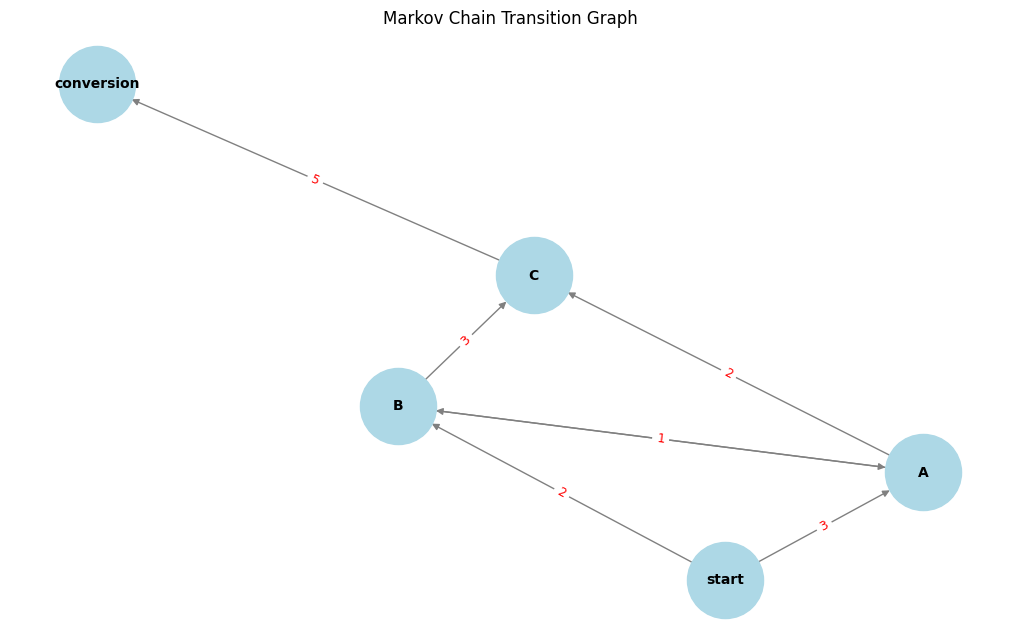


Graph Nodes: ['start', 'A', 'B', 'C', 'conversion']

Graph Edges: [('start', 'A', {'weight': 3}), ('start', 'B', {'weight': 2}), ('A', 'B', {'weight': 2}), ('A', 'C', {'weight': 2}), ('B', 'C', {'weight': 3}), ('B', 'A', {'weight': 1}), ('C', 'conversion', {'weight': 5})]

Transition Probabilities: {'start': {'A': 0.6, 'B': 0.4}, 'A': {'B': 0.5, 'C': 0.5}, 'B': {'C': 0.75, 'A': 0.25}, 'C': {'conversion': 1.0}, 'conversion': {}}

Base Conversion Probability: 0

Impact of Removing A: 0

Impact of Removing B: 0

Impact of Removing C: 0

Final Markov Attribution: {'A': 0, 'B': 0, 'C': 0}


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def visualize_markov_chain(G):
    """
    Visualizes the Markov Chain using NetworkX.
    """
    plt.figure(figsize=(10, 6))

    pos = nx.spring_layout(G)  # Node positioning
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color="red")

    plt.title("Markov Chain Transition Graph")
    plt.show()

def transition_probabilities(G):
    """
    Compute transition probabilities for a Markov Chain model.
    """
    P = {}

    for node in G.nodes():
        out_edges = list(G.out_edges(node, data='weight', default=0))
        total_out = sum(w for (_, _, w) in out_edges)  # Correct summation

        P[node] = {}
        for (src, tgt, w) in out_edges:
            P[node][tgt] = w / total_out if total_out > 0 else 0  # Normalize probabilities

    print("\nTransition Probabilities:", P)  # Debugging
    return P

def markov_chain_attribution(df):
    """
    Compute channel contributions using the Markov Chain model.
    """
    G = nx.DiGraph()

    # Step 1: Construct the graph
    for journey in df['path']:
        journey = ['start'] + journey.split('>') + ['conversion']
        for i in range(len(journey) - 1):
            if G.has_edge(journey[i], journey[i + 1]):
                G[journey[i]][journey[i + 1]]['weight'] += 1
            else:
                G.add_edge(journey[i], journey[i + 1], weight=1)

    # Visualizing the Markov Chain
    visualize_markov_chain(G)

    print("\nGraph Nodes:", G.nodes())
    print("\nGraph Edges:", G.edges(data=True))  # Debugging

    # Step 2: Compute transition probabilities
    P = transition_probabilities(G)

    # Step 3: Compute base conversion probability
    base_conversion_prob = compute_conversion_probability(P)
    print("\nBase Conversion Probability:", base_conversion_prob)

    # Step 4: Remove each channel and check impact
    removal_effect = {}

    for channel in df['channel'].unique():
        if channel not in P:
            continue  # Skip channels that are not in the transition matrix

        P_removed = remove_channel(P, channel)
        new_conversion_prob = compute_conversion_probability(P_removed)
        removal_effect[channel] = base_conversion_prob - new_conversion_prob
        print(f"\nImpact of Removing {channel}: {removal_effect[channel]}")  # Debugging

    return removal_effect

def compute_conversion_probability(P):
    """
    Compute probability of conversion from the transition matrix.
    """
    if 'start' not in P:
        return 0
    return P['start'].get('conversion', 0)

def remove_channel(P, channel):
    """
    Recompute transition probabilities after removing a channel.
    """
    P_removed = {k: v.copy() for k, v in P.items() if k != channel}  # Remove channel
    for node in P_removed:
        if channel in P_removed[node]:
            del P_removed[node][channel]  # Remove transitions to the channel
    return P_removed

# Example DataFrame
data = {
    'path': ['A>B>C', 'A>C', 'B>C', 'A>B>C', 'B>A>C'],
    'channel': ['A', 'B', 'C', 'A', 'B']
}
df = pd.DataFrame(data)

# Running the function
result = markov_chain_attribution(df)
print("\nFinal Markov Attribution:", result)


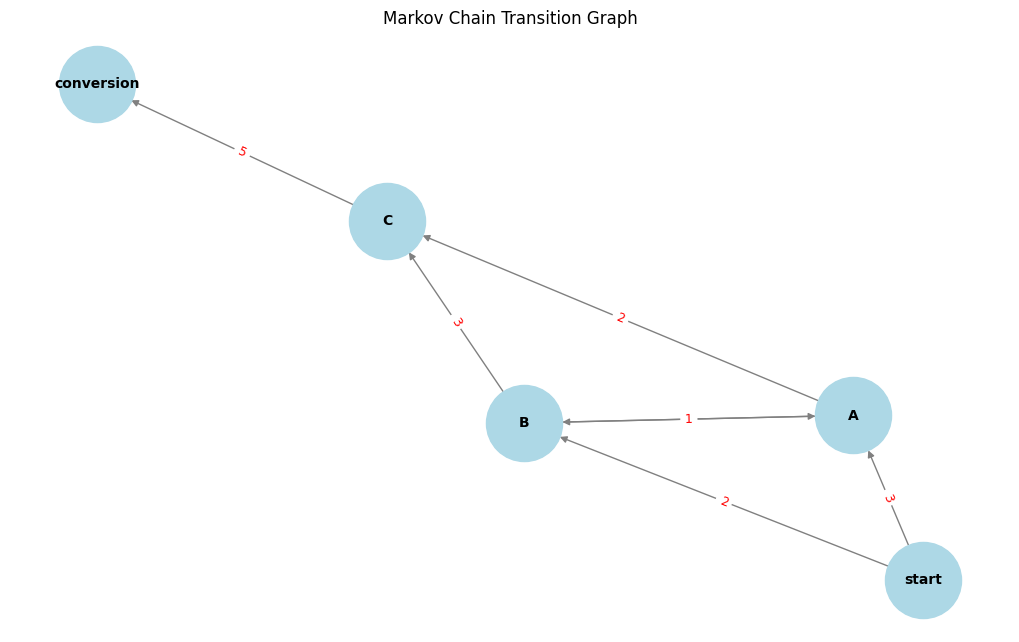

<ipython-input-11-dc81c92cc51f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data.keys()), y=list(data.values()), palette="coolwarm")


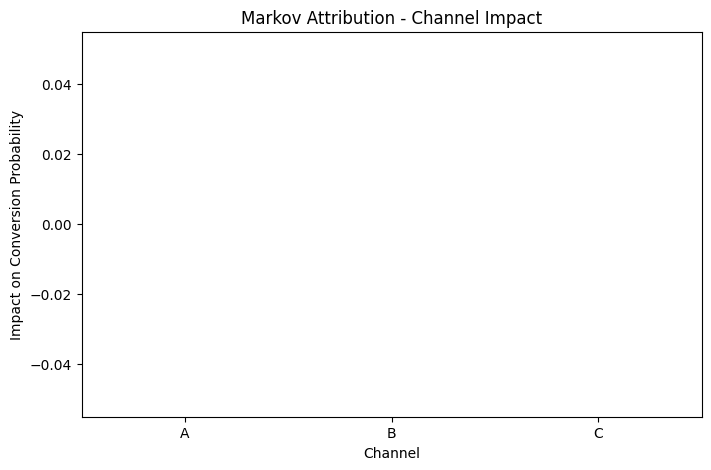

/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:3343: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 700x700 with 1 Axes>

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize Markov Chain Graph
def visualize_markov_chain(G):
    plt.figure(figsize=(10, 6))

    pos = nx.spring_layout(G)  # Positioning the nodes
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color="red")

    plt.title("Markov Chain Transition Graph")
    plt.show()

# Function to compute transition probabilities
def transition_probabilities(G):
    P = {}

    for node in G.nodes():
        out_edges = list(G.out_edges(node, data='weight', default=0))
        total_out = sum(w for (_, _, w) in out_edges)  # Correct summation

        P[node] = {}
        for (src, tgt, w) in out_edges:
            P[node][tgt] = w / total_out if total_out > 0 else 0  # Normalize probabilities

    return P

# Function to compute channel contributions using the Markov Chain model
def markov_chain_attribution(df):
    G = nx.DiGraph()

    # Step 1: Construct the graph
    for journey in df['path']:
        journey = ['start'] + journey.split('>') + ['conversion']
        for i in range(len(journey) - 1):
            if G.has_edge(journey[i], journey[i + 1]):
                G[journey[i]][journey[i + 1]]['weight'] += 1
            else:
                G.add_edge(journey[i], journey[i + 1], weight=1)

    # Step 2: Visualize Markov Chain Graph
    visualize_markov_chain(G)

    # Step 3: Compute transition probabilities
    P = transition_probabilities(G)

    # Step 4: Compute base conversion probability
    base_conversion_prob = compute_conversion_probability(P)

    # Step 5: Remove each channel and check impact
    removal_effect = {}

    for channel in df['channel'].unique():
        if channel not in P:
            continue  # Skip channels not in the transition matrix

        P_removed = remove_channel(P, channel)
        new_conversion_prob = compute_conversion_probability(P_removed)
        removal_effect[channel] = base_conversion_prob - new_conversion_prob

    # Step 6: Visualize Results
    visualize_bar_chart(removal_effect)
    visualize_pie_chart(removal_effect)

    return removal_effect

# Compute probability of conversion
def compute_conversion_probability(P):
    if 'start' not in P:
        return 0
    return P['start'].get('conversion', 0)

# Recompute transition probabilities after removing a channel
def remove_channel(P, channel):
    P_removed = {k: v.copy() for k, v in P.items() if k != channel}  # Remove channel
    for node in P_removed:
        if channel in P_removed[node]:
            del P_removed[node][channel]  # Remove transitions to the channel
    return P_removed

# Function to visualize a bar chart of channel contributions
def visualize_bar_chart(data):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(data.keys()), y=list(data.values()), palette="coolwarm")
    plt.xlabel("Channel")
    plt.ylabel("Impact on Conversion Probability")
    plt.title("Markov Attribution - Channel Impact")
    plt.show()

# Function to visualize a pie chart for attribution share
def visualize_pie_chart(data):
    plt.figure(figsize=(7, 7))
    plt.pie(data.values(), labels=data.keys(), autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title("Channel Attribution Distribution")
    plt.show()

# Example DataFrame
data = {
    'path': ['A>B>C', 'A>C', 'B>C', 'A>B>C', 'B>A>C'],
    'channel': ['A', 'B', 'C', 'A', 'B']
}
df = pd.DataFrame(data)

# Running the function
result = markov_chain_attribution(df)
print("\nFinal Markov Attribution:", result)


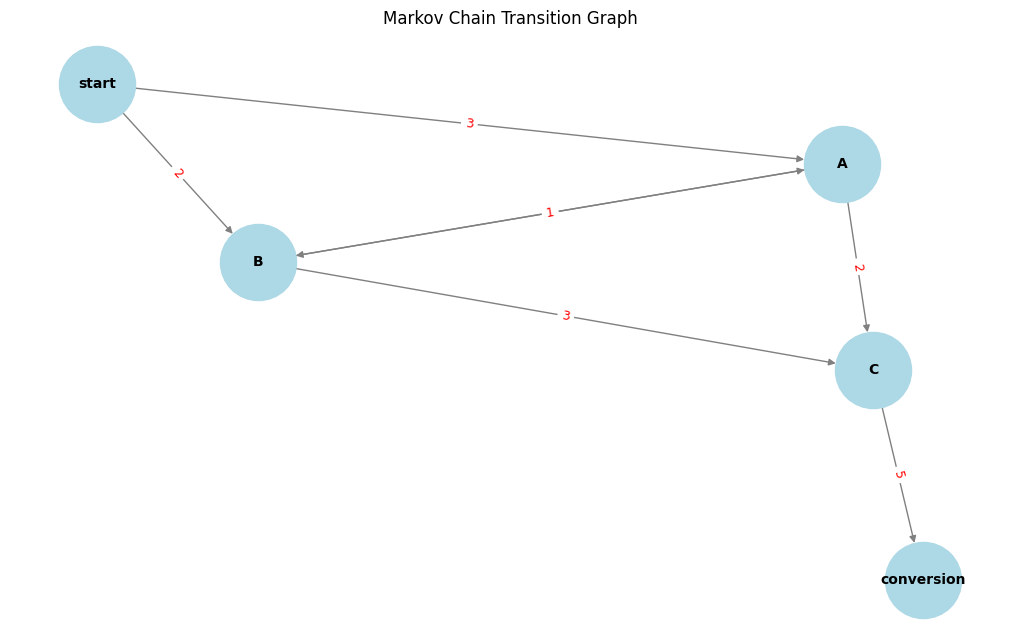

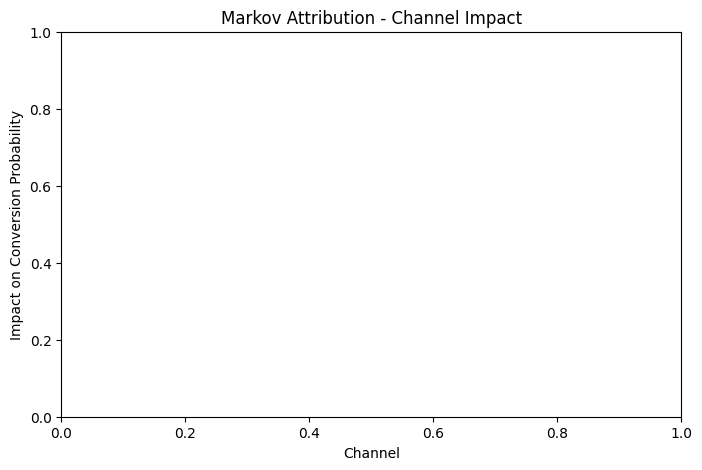

⚠️ No valid attribution data available to display.

Final Markov Attribution: {}


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize Markov Chain Graph
def visualize_markov_chain(G):
    plt.figure(figsize=(10, 6))

    pos = nx.spring_layout(G)  # Positioning the nodes
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color="red")

    plt.title("Markov Chain Transition Graph")
    plt.show()

# Function to compute transition probabilities
def transition_probabilities(G):
    P = {}

    for node in G.nodes():
        out_edges = list(G.out_edges(node, data='weight', default=0))
        total_out = sum(w for (_, _, w) in out_edges)  # Correct summation

        P[node] = {}
        for (src, tgt, w) in out_edges:
            P[node][tgt] = w / total_out if total_out > 0 else 0  # Normalize probabilities

    return P

# Function to compute channel contributions using the Markov Chain model
def markov_chain_attribution(df):
    G = nx.DiGraph()

    # Step 1: Construct the graph
    for journey in df['path']:
        journey = ['start'] + journey.split('>') + ['conversion']
        for i in range(len(journey) - 1):
            if G.has_edge(journey[i], journey[i + 1]):
                G[journey[i]][journey[i + 1]]['weight'] += 1
            else:
                G.add_edge(journey[i], journey[i + 1], weight=1)

    # Step 2: Visualize Markov Chain Graph
    visualize_markov_chain(G)

    # Step 3: Compute transition probabilities
    P = transition_probabilities(G)

    # Step 4: Compute base conversion probability
    base_conversion_prob = compute_conversion_probability(P)

    # Step 5: Remove each channel and check impact
    removal_effect = {}

    for channel in df['channel'].unique():
        if channel not in P:
            continue  # Skip channels not in the transition matrix

        P_removed = remove_channel(P, channel)
        new_conversion_prob = compute_conversion_probability(P_removed)
        removal_effect[channel] = base_conversion_prob - new_conversion_prob

    # **NEW: Handle NaN and Empty Data**
    removal_effect = {k: v for k, v in removal_effect.items() if not np.isnan(v) and v > 0}

    # Step 6: Visualize Results
    visualize_bar_chart(removal_effect)

    if removal_effect:  # Only plot pie chart if data exists
        visualize_pie_chart(removal_effect)
    else:
        print("⚠️ No valid attribution data available to display.")

    return removal_effect

# Compute probability of conversion
def compute_conversion_probability(P):
    if 'start' not in P:
        return 0
    return P['start'].get('conversion', 0)

# Recompute transition probabilities after removing a channel
def remove_channel(P, channel):
    P_removed = {k: v.copy() for k, v in P.items() if k != channel}  # Remove channel
    for node in P_removed:
        if channel in P_removed[node]:
            del P_removed[node][channel]  # Remove transitions to the channel
    return P_removed

# Function to visualize a bar chart of channel contributions
def visualize_bar_chart(data):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(data.keys()), y=list(data.values()), palette="coolwarm")
    plt.xlabel("Channel")
    plt.ylabel("Impact on Conversion Probability")
    plt.title("Markov Attribution - Channel Impact")
    plt.show()

# Function to visualize a pie chart for attribution share
def visualize_pie_chart(data):
    if not data:  # Handle empty dictionary
        print("⚠️ No data available for pie chart.")
        return

    plt.figure(figsize=(7, 7))
    plt.pie(data.values(), labels=data.keys(), autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title("Channel Attribution Distribution")
    plt.show()

# Example DataFrame
data = {
    'path': ['A>B>C', 'A>C', 'B>C', 'A>B>C', 'B>A>C'],
    'channel': ['A', 'B', 'C', 'A', 'B']
}
df = pd.DataFrame(data)

# Running the function
result = markov_chain_attribution(df)
print("\nFinal Markov Attribution:", result)


In [ ]:
plt.show(block=True)
